In [509]:
import sympy
from sympy import init_printing, N
from sympy.matrices import Matrix
import numpy as np
from scipy.linalg import orth, qr

init_printing()

# Motivation for orthogonality:
Condition grows under multiplication. Particularly, in AtA of normal equation. 

Initialize different matrixes

In [510]:
#A = np.array([[0, 1], [1, 0]]); symA = Matrix(A)  
A = np.array([[1, 2], [3, 4]]); symA = Matrix(A)  
A

array([[1, 2],
       [3, 4]])

In [511]:
symA

⎡1  2⎤
⎢    ⎥
⎣3  4⎦

#1. What is dimension of col(A)?

In [512]:
np.linalg.matrix_rank(A)

2

In [513]:
symA.rank()

In [514]:
symA.columnspace()

⎡⎡1⎤  ⎡2⎤⎤
⎢⎢ ⎥, ⎢ ⎥⎥
⎣⎣3⎦  ⎣4⎦⎦

#2. is A orthogonal?

In [515]:
A.T @ A

array([[10, 14],
       [14, 20]])

In [516]:
np.eye(A.shape[1])

array([[1., 0.],
       [0., 1.]])

In [517]:
np.allclose(A.T @ A, np.eye(A.shape[1]))

False

#3. compute its l1 norm

Norm

https://docs.scipy.org/doc/scipy/reference/generated/scipy.linalg.norm.html

In [518]:
np.linalg.norm(A, ord=1)

In [519]:
np.linalg.norm(A, ord=2)

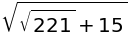

In [520]:
symA.norm(ord=2)

In [521]:
N(symA.norm(ord=2))

In [522]:
from math import sqrt
sqrt(sqrt(221) + 15)

In [523]:
np.linalg.norm(A) # Frobenius

In [524]:
symA.norm()

In [525]:
import math
from math import sqrt
sqrt(30)

In [526]:
np.linalg.norm(A, ord=np.inf)

In [527]:
# symA.norm(ord=1)
# symA.norm(1) # fails

stopped here

#4. compute Ainv

In [528]:
np.linalg.inv(A)

array([[-2. ,  1. ],
       [ 1.5, -0.5]])

In [529]:
symA.inv()

⎡-2    1  ⎤
⎢         ⎥
⎣3/2  -1/2⎦

#5. compute At

In [530]:
A.T

array([[1, 3],
       [2, 4]])

In [531]:
A.transpose()

array([[1, 3],
       [2, 4]])

In [532]:
symA.T

⎡1  3⎤
⎢    ⎥
⎣2  4⎦

In [533]:
symA.transpose()

⎡1  3⎤
⎢    ⎥
⎣2  4⎦

#6. compare Ainv to At

In [534]:
np.allclose(A.T, np.linalg.inv(A))

False

In [535]:
np.isclose(A.T, np.linalg.inv(A))

array([[False, False],
       [False, False]])

In [536]:
A.T - np.linalg.inv(A)

array([[3. , 2. ],
       [0.5, 4.5]])

#7. compute l1 norm of Ainv and A

In [537]:
normAinv = np.linalg.norm(np.linalg.inv(A), ord=1)
normAinv

In [538]:
normA = np.linalg.norm(A, ord=1)
normA

Condition number by multiplication normAinv * normA

In [539]:
normAinv * normA

#8. compute its condition number

In [540]:
np.linalg.cond(A, p=1)

#9. compute AtA

In [541]:
A.T @ A

array([[10, 14],
       [14, 20]])

check A for orthogonality by comparing AtA to an identity matrix

In [542]:
np.allclose(A.T @ A, np.identity(A.shape[1]))

False

#10. compute its l1 norm

In [543]:
np.linalg.norm(A.T @ A, ord=1)

#11. compute its inverse AtAinv

In [544]:
np.linalg.inv(A.T @ A)

array([[ 5. , -3.5],
       [-3.5,  2.5]])

In [545]:
np.allclose(np.linalg.inv(A.T @ A), np.identity(A.shape[1]))

False

#12. compute l1 norm of AtAinv 

In [546]:
np.linalg.norm(np.linalg.inv(A.T @ A), ord=1)

#13. compute condition number of AtA

In [547]:
np.linalg.cond(A.T @ A, p=1)

Check it by multiplication

In [548]:
np.linalg.norm(np.linalg.inv(A.T @ A), ord=1) * np.linalg.norm(A.T @ A, ord=1)

#14. compare condition numbers of A and AtA

In [549]:
np.linalg.cond(A, p=1), np.linalg.cond(A.T @ A, p=1)

------------------------------------------

#projection of a vector onto a vector

stopped here on a second review

Denote
a = (1, 2)T, b = (3, 4)T. 
Compute 
proj a  b

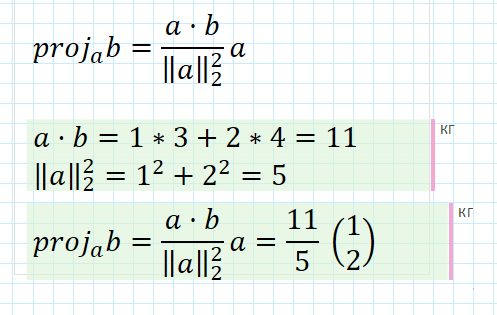

In [550]:
a = np.array([1, 2])
b = np.array([3, 4])
np.dot(a, b) / (np.linalg.norm(a)**2)

In [551]:
11/5 == 2.2

True

In [552]:
(np.dot(a, b) / np.linalg.norm(a)**2)*a

array([2.2, 4.4])

Заканчивается Грам-Шмидт. Что вверху должно пойти после проекции. 
#Projection of a vector onto a plain

In [553]:
v1 = np.array((1, 0, 0))
v2 = np.array((1, 1, 0))
b = np.array((1, 2, 3))

In [554]:
a1 = np.copy(v1)

In [555]:
a2 = v2 - (np.dot(v2, a1) / np.linalg.norm(a1)**2)*a1
a2

array([0., 1., 0.])

# Gram-Schmidt


Orthogonzlize it, giving a1, a2, a3. 

In [556]:
v1 = np.array([1, 0, 0])
v2 = np.array([0, 1, 1])
v3 = np.array([1, 2, 1])

In [557]:
r1 = np.copy(v1)
q1 = r1 / np.linalg.norm(r1)

In [558]:
(np.dot(v2, a1) / (np.linalg.norm(a1))**2)*a1

array([0., 0., 0.])

In [559]:
r2 = v2 - (np.dot(v2, q1))*q1
q2 = r2 / np.linalg.norm(r2)

In [560]:
r3 = v3 - np.dot(v3, q1)*q1 - np.dot(v3, q2)*q2
r3

array([ 0. ,  0.5, -0.5])

In [561]:
q3 = r3 / np.linalg.norm(r3)
q3

array([ 0.        ,  0.70710678, -0.70710678])

---------------------------- 

## 5. Compute proj a1 b

In [562]:
proj_b_on_a1 = (np.dot(b, a1) / (np.linalg.norm(a1))**2)*a1
proj_b_on_a1

array([1., 0., 0.])

##6. Compute proj a2 b

In [563]:
proj_b_on_a2 = (np.dot(b, a2) / (np.linalg.norm(a2))**2)*a2
proj_b_on_a2

array([0., 2., 0.])

##7. Compute bHat = proj {a1, a2} b

In [564]:
bHat = proj_b_on_a1 + proj_b_on_a2
bHat

array([1., 2., 0.])

##8. Find a residual vector r = b - bHat

In [565]:
r = b - bHat
r

array([0., 0., 3.])

##9. Compute the following dot products

		a. (v1.v2) = 1
		b. (a1.a2)= 0
		c. (r.v1) = 0
		d. (r.v2)=0
		e. (r.a1)=0
		f. (r.a2)=0
		g. (r.b)=9
        h. (r.bHat)=0

In [566]:
vectors1 = [v1, a1, r, r, r, r, r, r]
vectors2 = [v2, a2, v1, v2, a1, a2, b, bHat]


In [567]:
labels = ["v1 dot v2: ",
"a1 dot a2: ",
"r dot v1: ",
"r dot v2: ",
"r dot a1: ",
"r dot a2: ",
"r dot b: ",
"r dot bHat "] 
for i,j,k in zip(vectors1, vectors2, labels):
  print(k, str(i.dot(j)))

v1 dot v2:  0
a1 dot a2:  0.0
r dot v1:  0.0
r dot v2:  3.0
r dot a1:  0.0
r dot a2:  0.0
r dot b:  9.0
r dot bHat  0.0


In [568]:
v1.dot(v2)

0

In [569]:
a1.dot(a2)

In [570]:
r.dot(v1)

In [571]:
r.dot(v2)

In [572]:
r.dot(a1)

In [573]:
r.dot(a2)

In [574]:
r.dot(b)

In [575]:
r.dot(bHat)

##10. Check the following orthogonality statements
(Choose all that apply. None, one or more items can be chosen)

		a. v1 \orth v2 False
		b. a1 \orth a2 True
		c. r \orth v1 True
		d. r \orth v2 True
		e. r \orth a1True
		f. r \orth a2True
		g. r\orth b False 
		h. r\orthbHat True


In [576]:
labels = ["v1 orth v2: ",
"a1 orth a2: ",
"r orth v1: ",
"r orth v2: ",
"r orth a1: ",
"r orth a2: ",
"r orth b: ",
"r orth bHat: "] 

for i,j,k in zip(vectors1, vectors2, labels):
  print(k, str(not i.dot(j)))

v1 orth v2:  True
a1 orth a2:  True
r orth v1:  True
r orth v2:  False
r orth a1:  True
r orth a2:  True
r orth b:  False
r orth bHat:  True


In [577]:
not v1.dot(v2)

True

In [578]:
not a1.dot(a2)

True

In [579]:
not r.dot(v1)

True

In [580]:
not r.dot(v2)

False

In [581]:
not r.dot(a1)

True

In [582]:
not r.dot(a2)

True

In [583]:
not r.dot(b)

False

In [584]:
not r.dot(bHat)

True

Грам-Шмидт должен пойти сюда. 

#simple 2 by 2 QR examples

In [585]:
M = np.array([[1, 0], [0, 1]])
M = Matrix(M)

In [586]:
Q, R = M.QRdecomposition()
Q, R

⎛⎡1  0⎤  ⎡1  0⎤⎞
⎜⎢    ⎥, ⎢    ⎥⎟
⎝⎣0  1⎦  ⎣0  1⎦⎠

In [587]:
M = np.array([[1, 1], [0, 1]])
M = Matrix(M)

In [588]:
Q, R = M.QRdecomposition()
Q, R

⎛⎡1  0⎤  ⎡1  1⎤⎞
⎜⎢    ⎥, ⎢    ⎥⎟
⎝⎣0  1⎦  ⎣0  1⎦⎠

In [589]:
M = np.array([[0, 0], [0, 0]])
#M = Matrix(M)

In [590]:
%%script false
Q, R = M.QRdecomposition()
Q, R

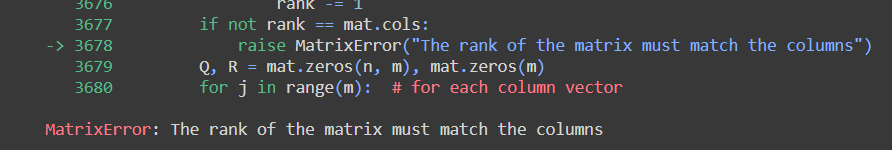

In [591]:
Q, R = np.linalg.qr(M)
Q, R

(array([[1., 0.],
        [0., 1.]]), array([[0., 0.],
        [0., 0.]]))

# Invertible 2 by 2 QR example

In [592]:
M = Matrix([[1, 1], [1, 0]])
M.QRdecomposition()

⎛⎡√2   √2 ⎤  ⎡    √2⎤⎞
⎜⎢──   ── ⎥  ⎢√2  ──⎥⎟
⎜⎢2    2  ⎥  ⎢    2 ⎥⎟
⎜⎢        ⎥, ⎢      ⎥⎟
⎜⎢√2  -√2 ⎥  ⎢    √2⎥⎟
⎜⎢──  ────⎥  ⎢0   ──⎥⎟
⎝⎣2    2  ⎦  ⎣    2 ⎦⎠

#Rectangular easy matrix QR (no scaling)

In [593]:
M = Matrix([[1, 1], [0, 1], [0, 0]])
M.QRdecomposition()

⎛⎡1  0⎤        ⎞
⎜⎢    ⎥  ⎡1  1⎤⎟
⎜⎢0  1⎥, ⎢    ⎥⎟
⎜⎢    ⎥  ⎣0  1⎦⎟
⎝⎣0  0⎦        ⎠

In [594]:
v1 = np.array([1, 0, 0])
v2 = np.array([1, 1, 0])

In [595]:
a1 = np.copy(v1)
a2 = v2 - (np.dot(v2, a1) / (np.linalg.norm(a1))**2)*a1
a2

array([0., 1., 0.])

-------------------------------

curiosity about QR decomposition of a matrix with incomplete column rank

In [596]:
unitMatrix = np.array([[1, 1], [1, 1]])
Q, R = np.linalg.qr(unitMatrix)
Q, R

(array([[-0.70710678, -0.70710678],
        [-0.70710678,  0.70710678]]), array([[-1.41421356, -1.41421356],
        [ 0.        ,  0.        ]]))

In [597]:
np.allclose(Q.T @ Q, np.eye(Q.shape[0]))

True

In [598]:
np.allclose(R.T @ R, np.eye(R.shape[0]))

False

In [599]:
Q @ R

array([[1., 1.],
       [1., 1.]])

In [600]:
symUnitMatrix = Matrix(unitMatrix)
#symUnitMatrix.QRdecomposition()

#How to create random orthonormal matrix in python numpy


In [601]:
from scipy.stats import ortho_group  # Requires version 0.18 of scipy

m = ortho_group.rvs(dim=3)
m

array([[-0.75947217, -0.21888501,  0.61261029],
       [ 0.03616397, -0.95444464, -0.29618845],
       [ 0.64953382, -0.20279246,  0.7327899 ]])

#Detect orthogonality

In [602]:
np.allclose(m.T @ m, np.eye(m.shape[0]))

True

In [603]:
non_orth = np.random.randn(3, 3)
non_orth

array([[-1.18417916,  0.23683684, -0.83885283],
       [-0.73083249, -0.80916496, -0.86372964],
       [-2.11614364,  0.31869377, -0.5855727 ]])

In [604]:
np.allclose(non_orth.T @ non_orth, np.eye(non_orth.shape[0]))

False

QR 3 by 3

In [605]:
V = np.array([
    [1, 1, 1], 
    [0, 1, 1], 
    [0, 0, 1]
])

In [606]:
Q3, R3 = np.linalg.qr(V)
Q3

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [607]:
R3

array([[1., 1., 1.],
       [0., 1., 1.],
       [0., 0., 1.]])

In [608]:
np.linalg.inv(R3)

array([[ 1., -1.,  0.],
       [ 0.,  1., -1.],
       [ 0.,  0.,  1.]])

QR 3 by 3 by sympy

In [609]:
from sympy.matrices import Matrix
data = np.array([
    [1, 1, 1], 
    [0, 1, 1], 
    [0, 0, 1]
])
V = Matrix(data)
Q, R = V.QRdecomposition()
V, Q, R

⎛⎡1  1  1⎤  ⎡1  0  0⎤  ⎡1  1  1⎤⎞
⎜⎢       ⎥  ⎢       ⎥  ⎢       ⎥⎟
⎜⎢0  1  1⎥, ⎢0  1  0⎥, ⎢0  1  1⎥⎟
⎜⎢       ⎥  ⎢       ⎥  ⎢       ⎥⎟
⎝⎣0  0  1⎦  ⎣0  0  1⎦  ⎣0  0  1⎦⎠

In [610]:
m1 =   Matrix([[1, 1, 1], 
               [0, 1, 1], 
               [0, 0, 1]])

m2 =   Matrix([[1, 1, 1], 
               [0, 1, 1], 
               [0, 0, 1]])

m3 =   Matrix([[1, 0, 0], 
               [0, 1, 0], 
               [0, 0, 1]])

m1, m2, m3

⎛⎡1  1  1⎤  ⎡1  1  1⎤  ⎡1  0  0⎤⎞
⎜⎢       ⎥  ⎢       ⎥  ⎢       ⎥⎟
⎜⎢0  1  1⎥, ⎢0  1  1⎥, ⎢0  1  0⎥⎟
⎜⎢       ⎥  ⎢       ⎥  ⎢       ⎥⎟
⎝⎣0  0  1⎦  ⎣0  0  1⎦  ⎣0  0  1⎦⎠

In [611]:
m1 =   Matrix([[1, 1, 1], 
               [0, 1, 1], 
               [0, 0, 1]])

m2 =   Matrix([[1, -1, 0], 
               [0, 1, -1], 
               [0, 0, 1]])

m3 =   Matrix([[1, 0, 0], 
               [0, 1, 0], 
               [0, 0, 1]])

m1, m2, m3

⎛⎡1  1  1⎤  ⎡1  -1  0 ⎤  ⎡1  0  0⎤⎞
⎜⎢       ⎥  ⎢         ⎥  ⎢       ⎥⎟
⎜⎢0  1  1⎥, ⎢0  1   -1⎥, ⎢0  1  0⎥⎟
⎜⎢       ⎥  ⎢         ⎥  ⎢       ⎥⎟
⎝⎣0  0  1⎦  ⎣0  0   1 ⎦  ⎣0  0  1⎦⎠

In [612]:
m1 =   Matrix([[1, 1, 1], 
               [0, 1, 1], 
               [0, 0, 1]])

m2 =   Matrix([[1, -1, 0], 
               [0, 1, -1], 
               [0, 0, 1]])

m3 =   Matrix([[1, 0, 0], 
               [0, 1, 0], 
               [0, 0, 1]])

m1, m3, m2

⎛⎡1  1  1⎤  ⎡1  0  0⎤  ⎡1  -1  0 ⎤⎞
⎜⎢       ⎥  ⎢       ⎥  ⎢         ⎥⎟
⎜⎢0  1  1⎥, ⎢0  1  0⎥, ⎢0  1   -1⎥⎟
⎜⎢       ⎥  ⎢       ⎥  ⎢         ⎥⎟
⎝⎣0  0  1⎦  ⎣0  0  1⎦  ⎣0  0   1 ⎦⎠

#Gram-Schmidt 4 by 3 new numbers, K

In [613]:
M = np.array([[1, 1, 3],
              [2, 1, 2],
              [2,-5, 8],
              [-1, 3, -7]])

In [614]:
v1 = np.array([1, 2, 2, -1])

In [615]:
np.linalg.norm(v1)

In [616]:
a1_hat = v1/np.linalg.norm(v1)
a1_hat

array([ 0.31622777,  0.63245553,  0.63245553, -0.31622777])

In [617]:
v2 = np.array([1, 1, -5, 3])

In [618]:
proj = v2.dot(a1_hat) * (a1_hat)
proj

array([-1., -2., -2.,  1.])

In [619]:
a2 = v2 - proj
a2

array([ 2.,  3., -3.,  2.])

In [620]:
np.linalg.norm(a2)

In [621]:
a2_hat = a2/np.linalg.norm(a2)
a2_hat

array([ 0.39223227,  0.58834841, -0.58834841,  0.39223227])

In [622]:
v3 = np.array([3, 2, 8, -7])

In [623]:
proj_v3_a1 = v3.dot(a1_hat) * (a1_hat)
proj_v3_a1

array([ 3.,  6.,  6., -3.])

In [624]:
proj_v3_a2 = v3.dot(a2_hat) * (a2_hat)
proj_v3_a2

array([-2., -3.,  3., -2.])

In [625]:
a3 = v3 - proj_v3_a2 - proj_v3_a1
a3

array([ 2., -1., -1., -2.])

In [626]:
np.linalg.norm(a3)

In [627]:
a3_hat = a3/np.linalg.norm(a3)
a3_hat

array([ 0.63245553, -0.31622777, -0.31622777, -0.63245553])

In [628]:
from sympy.matrices import GramSchmidt


In [629]:
M = Matrix(M)
M

⎡1   1   3 ⎤
⎢          ⎥
⎢2   1   2 ⎥
⎢          ⎥
⎢2   -5  8 ⎥
⎢          ⎥
⎣-1  3   -7⎦

In [630]:
# GramSchmidt(M, False)

In [631]:
Q, R = M.QRdecomposition()
Q, R

⎛⎡ √10     √26     √10 ⎤                    ⎞
⎜⎢ ───     ───     ─── ⎥                    ⎟
⎜⎢  10      13      5  ⎥                    ⎟
⎜⎢                     ⎥                    ⎟
⎜⎢ √10    3⋅√26   -√10 ⎥                    ⎟
⎜⎢ ───    ─────   ─────⎥  ⎡√10  -√10  3⋅√10⎤⎟
⎜⎢  5       26      10 ⎥  ⎢                ⎥⎟
⎜⎢                     ⎥, ⎢ 0   √26   -√26 ⎥⎟
⎜⎢ √10   -3⋅√26   -√10 ⎥  ⎢                ⎥⎟
⎜⎢ ───   ───────  ─────⎥  ⎣ 0    0     √10 ⎦⎟
⎜⎢  5       26      10 ⎥                    ⎟
⎜⎢                     ⎥                    ⎟
⎜⎢-√10     √26    -√10 ⎥                    ⎟
⎜⎢─────    ───    ─────⎥                    ⎟
⎝⎣  10      13      5  ⎦                    ⎠

In [632]:
Q, R = np.linalg.qr(M)

In [633]:
R

array([[-3.16227766,  3.16227766, -9.48683298],
       [ 0.        , -5.09901951,  5.09901951],
       [ 0.        ,  0.        ,  3.16227766]])

In [634]:
np.linalg.inv(R)

array([[-0.31622777, -0.19611614, -0.63245553],
       [-0.        , -0.19611614,  0.31622777],
       [ 0.        ,  0.        ,  0.31622777]])

In [635]:
Apinv = np.linalg.inv(R) @ Q.T
Apinv

array([[-0.22307692,  0.51538462,  0.28461538,  0.37692308],
       [ 0.27692308,  0.01538462, -0.21538462, -0.12307692],
       [ 0.2       , -0.1       , -0.1       , -0.2       ]])

In [636]:
b = np.array([[5], [5], [5], [-5]])
x = Apinv @ b
x

array([[1.],
       [1.],
       [1.]])